In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency

In [109]:
df=pd.read_csv("C:/Users/Admin/Desktop/SEMESTER 3/Stat Learning/Diabetic_Project/diabetic_data.csv")

In [85]:
df.shape

(101766, 50)

In [86]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [87]:
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [110]:
df_mod=df

In [111]:
df_mod.replace('?',np.nan,inplace=True)

In [112]:
df_mod.describe(include='all')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,99493,101766,101766,3197,101766.000000,101766.000000,101766.000000,101766.000000,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,5,3,10,9,NaN,NaN,NaN,NaN,...,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),[75-100),NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,1336,NaN,NaN,NaN,NaN,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
df_mod.isna().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

# Handling Missing Values

In [114]:
null_percentages=(df_mod.isnull().mean() * 100).round(2)
null_percentages=null_percentages[null_percentages>0]
null_percentages

race                  2.23
weight               96.86
payer_code           39.56
medical_specialty    49.08
diag_1                0.02
diag_2                0.35
diag_3                1.40
max_glu_serum        94.75
A1Cresult            83.28
dtype: float64

In [115]:
columns_with_nulls = null_percentages[null_percentages > 0].index.tolist()
columns_with_nulls

['race',
 'weight',
 'payer_code',
 'medical_specialty',
 'diag_1',
 'diag_2',
 'diag_3',
 'max_glu_serum',
 'A1Cresult']

Checking if the missing values are relatively random or not 

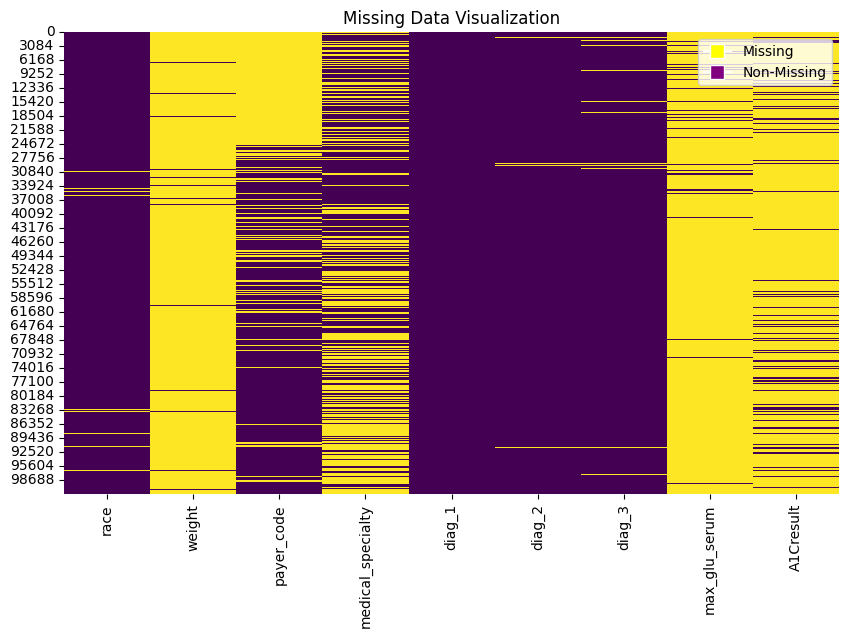

In [116]:

# Assuming 'df' is your DataFrame with missing values
# Replace this with your actual DataFrame

# Generate a binary matrix indicating missing values
missing_data = df_mod[columns_with_nulls].isnull()

# Create a heatmap to visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(missing_data, cbar=False, cmap='viridis')

plt.legend(handles=[
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='yellow', markersize=10, label='Missing'),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='purple', markersize=10, label='Non-Missing')
])



plt.title('Missing Data Visualization')
plt.show()


In [118]:
df_mod.race.unique()


array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

The chi-square test is used to assess the association between two categorical variables. The test produces a chi-square statistic and a p-value

In [119]:
chi2_stat, p_value, _, _ = chi2_contingency(pd.crosstab(df['race'], df['readmitted']))
print(f"Chi-squared statistic: {chi2_stat}, p-value: {p_value}")

Chi-squared statistic: 94.3890268194556, p-value: 5.957898752282338e-17


Chi-squared statistic is the test statistic that measures the difference between the observed and expected frequencies. In essence, it quantifies how much the observed distribution deviates from the distribution expected under the assumption of independence between the variables.

The p-value is the probability of observing a chi-squared statistic as extreme as the one calculated if there were no association between the variables. In this case, the p-value is extremely small, indicating strong evidence against the null hypothesis of independence.With such a small p-value (close to zero), you can confidently reject the null hypothesis. There is strong evidence to suggest that there is an association between the variables represented in your chi-square test

Conclusion:
The data provides significant evidence to conclude that there is an association between the variables being analyzed.So we cannot remove the race column.

Given that the "race" column is categorical and there is a significant association with the target variable (as indicated by the chi-square test with a low p-value), you may want to consider a more advanced imputation method that takes into account the relationships between variables.So, We go with KNN imputation to impute missing "race".

#Correlation analysis to explore relationship b/w categorical variables.

In [120]:
object_columns = df_mod.select_dtypes(include=['object']).columns 

In [121]:
ar=[]
for B in object_columns:
    contingency_table = pd.crosstab(df['race'], df[B])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    v = np.sqrt(chi2 / (n * min_dim))
    #print(f"Cramér's V: {v}")
    my_dict = {'column': B, 'v': v}
    ar.append(my_dict)

ar

C:\Users\Admin\AppData\Local\Temp\ipykernel_30020\3534867733.py:7: RuntimeWarning: invalid value encountered in divide
  v = np.sqrt(chi2 / (n * min_dim))
C:\Users\Admin\AppData\Local\Temp\ipykernel_30020\3534867733.py:7: RuntimeWarning: invalid value encountered in divide
  v = np.sqrt(chi2 / (n * min_dim))
C:\Users\Admin\AppData\Local\Temp\ipykernel_30020\3534867733.py:7: RuntimeWarning: invalid value encountered in divide
  v = np.sqrt(chi2 / (n * min_dim))


[{'column': 'race', 'v': 1.0},
 {'column': 'gender', 'v': 0.053478516179875},
 {'column': 'age', 'v': 0.09661021140098963},
 {'column': 'weight', 'v': 0.06974864200189416},
 {'column': 'payer_code', 'v': 0.10616697326773811},
 {'column': 'medical_specialty', 'v': 0.13343897528771176},
 {'column': 'diag_1', 'v': 0.1464049420550472},
 {'column': 'diag_2', 'v': 0.1406718951869113},
 {'column': 'diag_3', 'v': 0.12574662575308304},
 {'column': 'max_glu_serum', 'v': 0.024503976795746493},
 {'column': 'A1Cresult', 'v': 0.06085665184266855},
 {'column': 'metformin', 'v': 0.01383216544727745},
 {'column': 'repaglinide', 'v': 0.015777885989125558},
 {'column': 'nateglinide', 'v': 0.011562511451587588},
 {'column': 'chlorpropamide', 'v': 0.007420280990976216},
 {'column': 'glimepiride', 'v': 0.014033071390615366},
 {'column': 'acetohexamide', 'v': 0.0017577968718350174},
 {'column': 'glipizide', 'v': 0.015529592368162917},
 {'column': 'glyburide', 'v': 0.01789658628643176},
 {'column': 'tolbutami

In [122]:
# Filter the list of dictionaries
filtered_ar = [item for item in ar if item['v'] >= 0.5]

# Print the filtered list
print(filtered_ar)


[{'column': 'race', 'v': 1.0}]


There are no correlated columns or no other features that can provide useful information for imputing the missing values in the "Race" column, using a KNN imputer may not be the most effective approach. KNN imputation relies on the similarity between instances based on their feature values, and if there are no correlated columns, the imputation may not yield accurate results.

So, now we can go with Model-Based Imputation or Manual Imputation .Here we go with manual Imputation.

In [123]:
mode_race = df_mod['race'].mode().iloc[0] # Use mode() for categorical data
df_mod['race'].fillna(mode_race, inplace=True)

Since, weight column has 96.86% missing Values .Given the high percentage of missing values, We may consider dropping this column.

In [124]:
df_mod.drop('weight',axis=1,inplace=True)

In [125]:
df_mod.payer_code.unique()

array([nan, 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM',
       'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR'], dtype=object)

In [126]:
df_mod.readmitted.unique()

array(['NO', '>30', '<30'], dtype=object)

In [127]:
chi2_stat, p_value, _, _ = chi2_contingency(pd.crosstab(df_mod['payer_code'], df_mod['readmitted']))
print(f"Chi-squared statistic: {chi2_stat}, p-value: {p_value}")

Chi-squared statistic: 507.43086767677033, p-value: 6.135414225198951e-87


In [128]:
# Replace missing values in the 'payer_code' column with a default code (e.g., 'MISSING')
df_mod['payer_code'].fillna('MISSING', inplace=True)


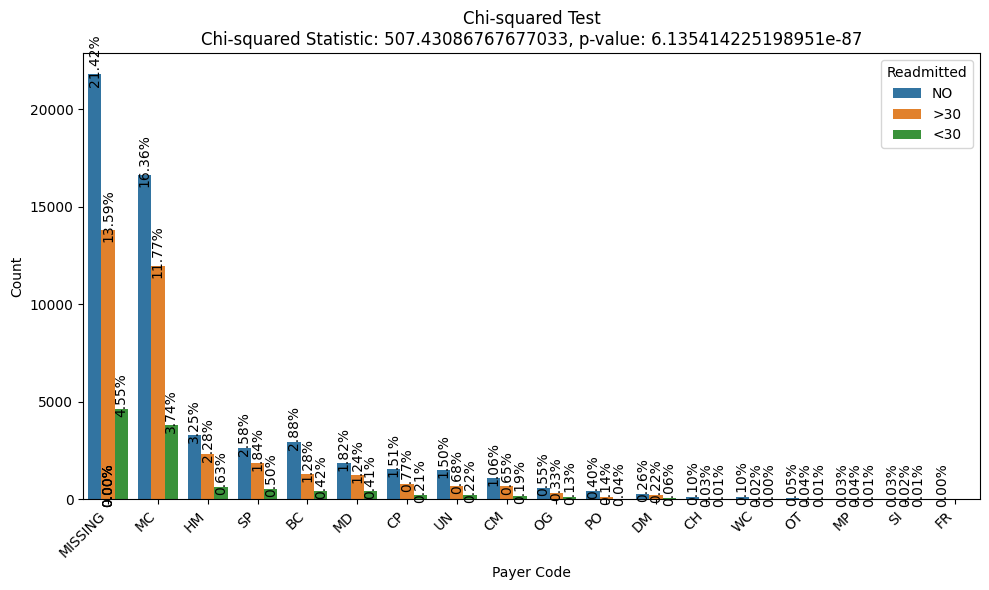

In [129]:
# Plot a stacked bar chart
#To visualise the chi-square test between payer_code and readmitted
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='payer_code', hue='readmitted', data=df_mod, order=df_mod['payer_code'].value_counts().index)
plt.title(f'Chi-squared Test\nChi-squared Statistic: {chi2_stat}, p-value: {p_value}')
plt.xlabel('Payer Code')
plt.ylabel('Count')
plt.legend(title='Readmitted', loc='upper right')
#plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
#plt.show()

total_records = len(df_mod)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total_records * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation='vertical')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the above graph we can say that the misssing values are random 

We go with Frequency-Based Imputation to fill the missing values of the payer_code because this method maintains the distribution of "payer_code" categories and 
suitable when you want to preserve the variability in the original distribution.

In [130]:
df_mod['payer_code'].replace('MISSING', np.nan, inplace=True)

In [132]:

freq_counts = df_mod['payer_code'].value_counts(normalize=True)
df_mod['payer_code'].fillna(pd.Series(np.random.choice(freq_counts.index, p=freq_counts.values, size=len(df_mod))), inplace=True)


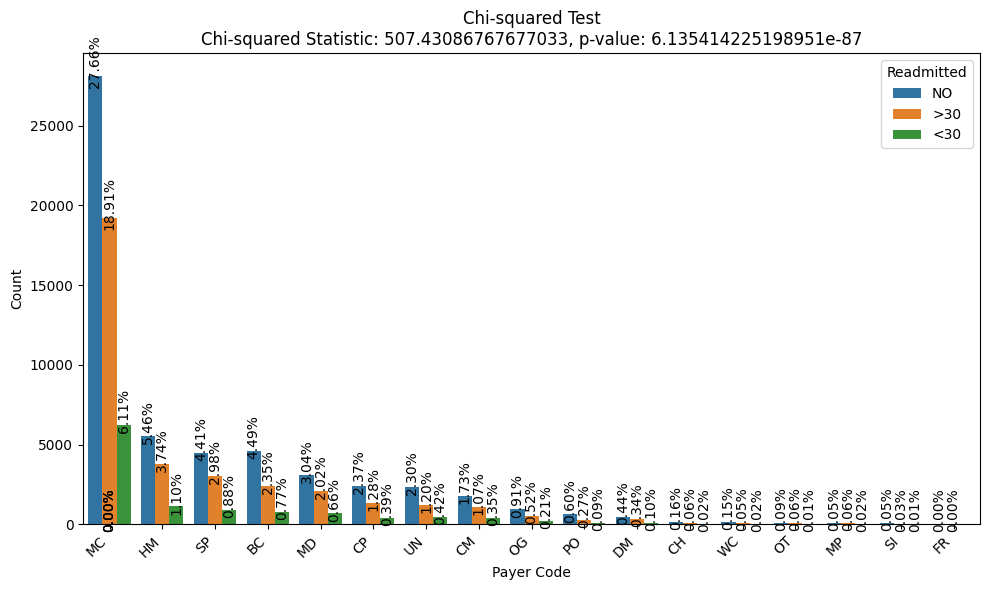

In [134]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='payer_code', hue='readmitted', data=df_mod, order=df_mod['payer_code'].value_counts().index)
plt.title(f'Chi-squared Test\nChi-squared Statistic: {chi2_stat}, p-value: {p_value}')
plt.xlabel('Payer Code')
plt.ylabel('Count')
plt.legend(title='Readmitted', loc='upper right')
#plt.xticks(rotation=45, ha='right')
#plt.tight_layout()
#plt.show()

total_records = len(df_mod)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total_records * 100
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', rotation='vertical')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

For columns diag_1 (0.02% missing), diag_2 (0.35% missing), diag_3 (1.40% missing).Given the low percentage of missing values, We could drop rows with missing values or impute using the mode or other relevant statistics.So we decided to drop the missing rows.

In [137]:

# Drop rows with missing values in specified columns
df_mod = df_mod.dropna(subset=['diag_1', 'diag_2', 'diag_3'])

# The 'df_cleaned' DataFrame now contains rows without missing values in 'Diag_1', 'Diag_2', and 'Diag_3'


In [140]:
df_mod.medical_specialty.unique()

array([nan, 'InternalMedicine', 'Family/GeneralPractice', 'Cardiology',
       'Surgery-General', 'Orthopedics', 'Gastroenterology',
       'Surgery-Cardiovascular/Thoracic', 'Nephrology',
       'Orthopedics-Reconstructive', 'Psychiatry', 'Emergency/Trauma',
       'Pulmonology', 'Surgery-Neuro',
       'Obsterics&Gynecology-GynecologicOnco', 'ObstetricsandGynecology',
       'Pediatrics', 'Hematology/Oncology', 'Otolaryngology',
       'Pediatrics-Endocrinology', 'Surgery-Colon&Rectal',
       'Endocrinology', 'Urology', 'Pediatrics-CriticalCare',
       'Psychiatry-Child/Adolescent', 'Pediatrics-Pulmonology',
       'Neurology', 'Anesthesiology-Pediatric', 'Radiology',
       'Pediatrics-Hematology-Oncology', 'Podiatry', 'Gynecology',
       'Oncology', 'Pediatrics-Neurology', 'Surgery-Plastic',
       'Surgery-Thoracic', 'Surgery-PlasticwithinHeadandNeck',
       'Psychology', 'Ophthalmology', 'Surgery-Pediatric',
       'PhysicalMedicineandRehabilitation', 'InfectiousDiseases',
  

In [143]:
chi2_stat, p_value, _, _ = chi2_contingency(pd.crosstab(df_mod['medical_specialty'], df_mod['readmitted']))
print(f"Chi-squared statistic: {chi2_stat}, p-value: {p_value}")

Chi-squared statistic: 1129.306608391776, p-value: 2.387092423096171e-153


In [148]:
chi2_stat, p_value, _, _ = chi2_contingency(pd.crosstab(df_mod['A1Cresult'], df_mod['readmitted']))
print(f"Chi-squared statistic: {chi2_stat}, p-value: {p_value}")

Chi-squared statistic: 24.574790474736282, p-value: 6.124799902633805e-05


In [138]:
null_percentages=(df_mod.isnull().mean() * 100).round(2)
null_percentages=null_percentages[null_percentages>0]
null_percentages

medical_specialty    49.36
max_glu_serum        94.75
A1Cresult            83.44
dtype: float64